<a href="https://colab.research.google.com/github/Bigbooon/-Server---Client-Chat/blob/main/ass9_final_ml_up.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving clean_kolesa_dataset.csv to clean_kolesa_dataset (1).csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['clean_kolesa_dataset (1).csv']))

In [ ]:
df.head()

,Бренд,Модель,Год,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Цена,Средння цена,Ссылка,Вид топлива
0,Nissan,Primera,1995,Шымкент,седан,1.6,319214.0,механика,слева,серебристый,передний привод,Да,881000.0,993000.0,https://kolesa.kz/a/show/112711467,бензин
1,Mitsubishi,L200,2020,Алматы,пикап,2.4,140000.0,механика,слева,белый,полный привод,Да,14490000.0,NaN,https://kolesa.kz/a/show/112530869,дизель
2,ВАЗ (Lada),2115 (седан),2007,Актобе,седан,1.5,140000.0,механика,слева,зеленый,передний привод,Нет,750000.0,982000.0,https://kolesa.kz/a/show/112633046,бензин
3,Porsche,Cayenne Coupe,2020,Нур-Султан (Астана),кроссовер,3.0,140000.0,автомат,слева,белый,полный привод,Да,56062500.0,NaN,https://kolesa.kz/a/show/112082674,бензин
4,JAC,T6,2020,Костанай,пикап,2.0,140000.0,механика,слева,белый,полный привод,Да,7550000.0,NaN,https://kolesa.kz/a/show/111227748,дизель


In [ ]:
df.drop('Ссылка', axis=1, inplace=True)

In [ ]:
df['Модель'].fillna(df['Модель'].mode()[0], inplace=True)
df['Объем двигателя, л'].fillna(df['Объем двигателя, л'].median(), inplace=True)
df['Привод'].fillna(df['Привод'].mode()[0], inplace=True)
df['Средння цена'].fillna(df['Средння цена'].median(), inplace=True)
df['Вид топлива'].fillna(df['Вид топлива'].mode()[0], inplace=True)

<ipython-input-314-662584bcd21f>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Модель'].fillna(df['Модель'].mode()[0], inplace=True)
<ipython-input-314-662584bcd21f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Бренд                      0
Модель                     0
Год                        0
Город                      0
Кузов                      0
Объем двигателя, л         0
Пробег                     0
Коробка передач            0
Руль                       0
Цвет                       0
Привод                     0
Растаможен в Казахстане    0
Цена                       0
Средння цена               0
Вид топлива                0
dtype: int64


In [ ]:
df['is_expensive'] = (df['Цена'] > df['Средння цена']).astype(int)

In [ ]:
categorical_columns = ['Бренд', 'Модель', 'Город', 'Кузов', 'Коробка передач', 'Руль', 'Цвет', 'Привод', 'Растаможен в Казахстане', 'Вид топлива']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [ ]:
#from sklearn.preprocessing import StandardScaler

#numerical_columns = ['Объем двигателя, л', 'Пробег', 'Цена', 'Средння цена']

#scaler = StandardScaler()
#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
df.head()

,Год,"Объем двигателя, л",Пробег,Цена,Средння цена,is_expensive,Бренд_Alfa Romeo,Бренд_Audi,Бренд_BAIC,Бренд_BMW,...,Цвет_хамелеон,Цвет_хамелеон металлик,Цвет_черный,Цвет_черный металлик,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Нет,Вид топлива_газ,Вид топлива_гибрид,Вид топлива_дизель
0,1995,1.6,319214.0,881000.0,993000.0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2020,2.4,140000.0,14490000.0,3271000.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2007,1.5,140000.0,750000.0,982000.0,0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,2020,3.0,140000.0,56062500.0,3271000.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2020,2.0,140000.0,7550000.0,3271000.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
X = df.drop(columns=['Цена', 'Средння цена', 'is_expensive'])
y_linear = df['Цена']

In [ ]:
y_logistic = df['is_expensive']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y_linear, test_size=0.2, random_state=42)

X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X, y_logistic, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

models_linear = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}


best_mse = float('inf')
best_r2 = -float('inf')
best_linear_model_mse = None
best_linear_model_r2 = None
linear_metrics = {}


for model_name, model in models_linear.items():
    model.fit(X_train_linear, y_train_linear)

    y_pred_linear = model.predict(X_test_linear)

    mse = mean_squared_error(y_test_linear, y_pred_linear)
    r2 = r2_score(y_test_linear, y_pred_linear)

    linear_metrics[model_name] = {'MSE': mse, 'R²': r2}

    if mse < best_mse:
        best_mse = mse
        best_linear_model_mse = model_name
    if r2 > best_r2:
        best_r2 = r2
        best_linear_model_r2 = model_name

print("\nAll Linear Regression Model Metrics:")
for model_name, metrics in linear_metrics.items():
    print(f"{model_name} - MSE: {metrics['MSE']} | R²: {metrics['R²']}")

print(f"\nBest Linear Regression Model by MSE: {best_linear_model_mse} with MSE: {best_mse}")
print(f"Best Linear Regression Model by R²: {best_linear_model_r2} with R²: {best_r2}")



All Linear Regression Model Metrics:
Linear Regression - MSE: 11504448601686.875 | R²: 0.7905541400747852
Decision Tree - MSE: 5124336370728.435 | R²: 0.9067081722147118
Random Forest - MSE: 3460637822164.3726 | R²: 0.9369968705456547
SVR - MSE: 59751497009700.125 | R²: -0.08781429743451907
KNN - MSE: 21871357628155.297 | R²: 0.6018179171586537

Best Linear Regression Model by MSE: Random Forest with MSE: 3460637822164.3726
Best Linear Regression Model by R²: Random Forest with R²: 0.9369968705456547


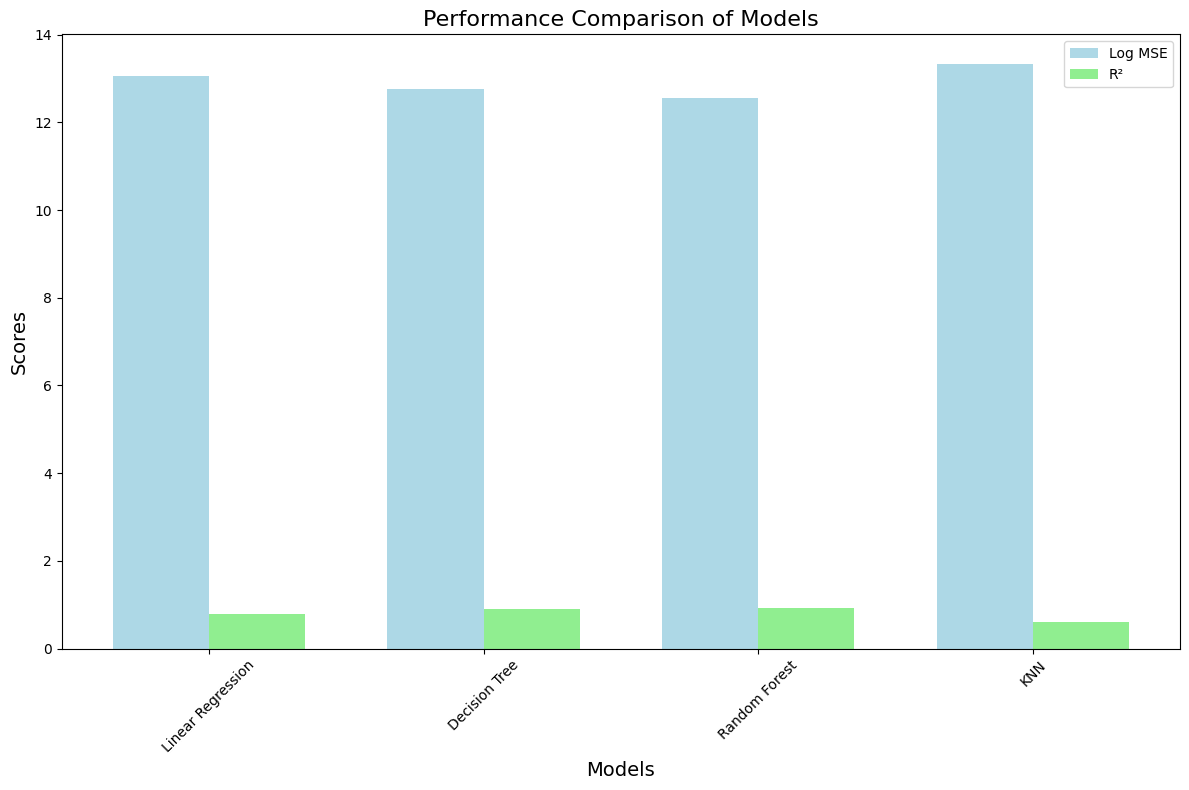

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models_linear = list(linear_metrics.keys())
mse_values = [linear_metrics[model]['MSE'] for model in models_linear]
r2_values = [linear_metrics[model]['R²'] for model in models_linear]

mse_values_log = np.log10(np.array(mse_values) + 1)

valid_models = [model for model, r2 in zip(models_linear, r2_values) if r2 >= 0]
valid_mse_values = [mse_values_log[i] for i, r2 in enumerate(r2_values) if r2 >= 0]
valid_r2_values = [r2 for r2 in r2_values if r2 >= 0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

x = np.arange(len(valid_models))
ax1.bar(x, valid_mse_values, color="lightblue")
ax1.set_xlabel('Models', fontsize=14)
ax1.set_ylabel('Log MSE', fontsize=14)
ax1.set_title('Log MSE Comparison of Models', fontsize=16)
ax1.set_xticks(x)
ax1.set_xticklabels(valid_models, rotation=45)

ax2.bar(x, valid_r2_values, color="lightgreen")
ax2.set_xlabel('Models', fontsize=14)
ax2.set_ylabel('R²', fontsize=14)
ax2.set_title('R² Comparison of Models', fontsize=16)
ax2.set_xticks(x)
ax2.set_xticklabels(valid_models, rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

models_logistic = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

best_accuracy = 0
best_logistic_model = None
logistic_accuracy_list = {}

for model_name, model in models_logistic.items():
    model.fit(X_train_logistic, y_train_logistic)

    y_pred_logistic = model.predict(X_test_logistic)

    accuracy = accuracy_score(y_test_logistic, y_pred_logistic)
    logistic_accuracy_list[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")
    print(classification_report(y_test_logistic, y_pred_logistic))

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_logistic_model = model_name

print("\nAll Logistic Regression Model Accuracies:")
for model_name, accuracy in logistic_accuracy_list.items():
    print(f"{model_name}: {accuracy}")

print(f"\nBest Logistic Regression Model: {best_logistic_model} with Accuracy: {best_accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.6329747310482862
              precision    recall  f1-score   support

           0       0.67      0.78      0.72      2407
           1       0.55      0.40      0.47      1590

    accuracy                           0.63      3997
   macro avg       0.61      0.59      0.59      3997
weighted avg       0.62      0.63      0.62      3997

Decision Tree Accuracy: 0.6710032524393295
              precision    recall  f1-score   support

           0       0.73      0.73      0.73      2407
           1       0.59      0.58      0.58      1590

    accuracy                           0.67      3997
   macro avg       0.66      0.66      0.66      3997
weighted avg       0.67      0.67      0.67      3997

Random Forest Accuracy: 0.6910182636977733
              precision    recall  f1-score   support

           0       0.72      0.80      0.76      2407
           1       0.64      0.52      0.57      1590

    accuracy                           0.69    

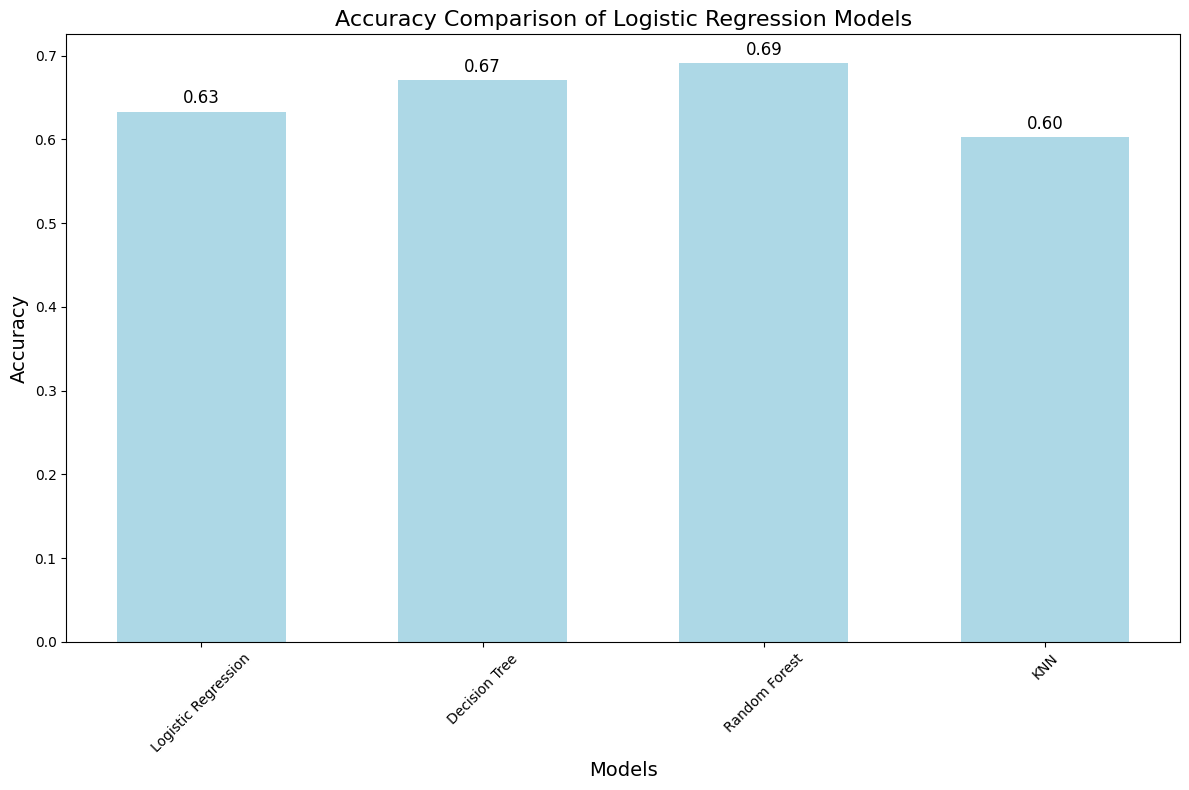

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models_logistic = list(logistic_accuracy_list.keys())
accuracy_values = list(logistic_accuracy_list.values())

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(models_logistic))
plt.bar(x, accuracy_values, color="lightblue", width=0.6)

plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Accuracy Comparison of Logistic Regression Models', fontsize=16)
plt.xticks(x, models_logistic, rotation=45)

for i, acc in enumerate(accuracy_values):
    plt.text(x[i], acc + 0.01, f"{acc:.2f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

+bonus

In [ ]:
df.head()

,Год,"Объем двигателя, л",Пробег,Цена,Средння цена,is_expensive,Бренд_Alfa Romeo,Бренд_Audi,Бренд_BAIC,Бренд_BMW,...,Цвет_хамелеон,Цвет_хамелеон металлик,Цвет_черный,Цвет_черный металлик,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Нет,Вид топлива_газ,Вид топлива_гибрид,Вид топлива_дизель
0,1995,1.6,319214.0,881000.0,993000.0,0,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,2020,2.4,140000.0,14490000.0,3271000.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
2,2007,1.5,140000.0,750000.0,982000.0,0,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
3,2020,3.0,140000.0,56062500.0,3271000.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2020,2.0,140000.0,7550000.0,3271000.0,1,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [ ]:
data = pd.read_csv('clean_kolesa_dataset.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19985 entries, 0 to 19984
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Бренд                    19985 non-null  object 
 1   Модель                   19950 non-null  object 
 2   Год                      19985 non-null  int64  
 3   Город                    19985 non-null  object 
 4   Кузов                    19985 non-null  object 
 5   Объем двигателя, л       19971 non-null  float64
 6   Пробег                   19985 non-null  float64
 7   Коробка передач          19985 non-null  object 
 8   Руль                     19985 non-null  object 
 9   Цвет                     19985 non-null  object 
 10  Привод                   17740 non-null  object 
 11  Растаможен в Казахстане  19985 non-null  object 
 12  Цена                     19985 non-null  float64
 13  Средння цена             18806 non-null  float64
 14  Ссылка                

In [ ]:
import pandas as pd

brands = data['Бренд'].unique()
models = data['Модель'].unique()
years = data['Год'].unique()
cities = data['Город'].unique()
body_types = data['Кузов'].unique()
fuel_values = data['Объем двигателя, л'].unique()
run_values = data['Пробег'].unique()
transmission_types = data['Коробка передач'].unique()
wheel_drives = data['Руль'].unique()
colors = data['Цвет'].unique()
drive_types = data['Привод'].unique()
fuel_types = data['Вид топлива'].unique()
registered = data['Растаможен в Казахстане'].unique()

In [ ]:
import ipywidgets as widgets
from IPython.display import display


brand_dropdown = widgets.Dropdown(
    options=brands.tolist(),
    description='Бренд:'
)
model_dropdown = widgets.Dropdown(
    options=models.tolist(),
    description='Модель:'
)
city_dropdown = widgets.Dropdown(
    options=cities.tolist(),
    description='Город:'
)
body_type_dropdown = widgets.Dropdown(
    options=body_types.tolist(),
    description='Кузов:'
)
transmission_dropdown = widgets.Dropdown(
    options=transmission_types.tolist(),
    description='Коробка:'
)
wheel_drive_dropdown = widgets.Dropdown(
    options=wheel_drives.tolist(),
    description='Руль:'
)
color_dropdown = widgets.Dropdown(
    options=colors.tolist(),
    description='Цвет:'
)
drive_type_dropdown = widgets.Dropdown(
    options=drive_types.tolist(),
    description='Привод:'
)
fuel_type_dropdown = widgets.Dropdown(
    options=fuel_types.tolist(),
    description='Топливо:'
)
year_slider = widgets.IntSlider(
    value=years.min(),
    min=years.min(),
    max=years.max(),
    step=1,
    description='Год:'
)
fuel_value_dropdown = widgets.Dropdown(
    options=fuel_values.tolist(),
    description='Объем двигателя:'
)
run_slider = widgets.IntSlider(
    value=run_values.min(),
    min=run_values.min(),
    max=run_values.max(),
    step=1000,
    description='Пробег:'
)
registered_dropdown = widgets.Dropdown(
    options=registered.tolist(),
    description='Растаможен:'
)


display(brand_dropdown, model_dropdown, city_dropdown, body_type_dropdown,
        transmission_dropdown, wheel_drive_dropdown, color_dropdown,
        drive_type_dropdown, fuel_type_dropdown, year_slider, fuel_value_dropdown, run_slider, registered_dropdown)

Dropdown(description='Бренд:', options=('Nissan', 'Mitsubishi', 'ВАЗ (Lada)', 'Porsche', 'JAC', 'Toyota', 'Che…

Dropdown(description='Модель:', options=('Primera', 'L200', '2115 (седан)', 'Cayenne Coupe', 'T6', 'Camry', 'J…

Dropdown(description='Город:', options=('Шымкент', 'Алматы', 'Актобе', 'Нур-Султан (Астана)', 'Костанай', 'Кар…

Dropdown(description='Кузов:', options=('седан', 'пикап', 'кроссовер', 'лифтбек', 'универсал', 'внедорожник', …

Dropdown(description='Коробка:', options=('механика', 'автомат', 'вариатор', 'типтроник', 'робот'), value='мех…

Dropdown(description='Руль:', options=('слева', 'справа'), value='слева')

Dropdown(description='Цвет:', options=('серебристый', 'белый', 'зеленый', 'черный металлик', 'черный', 'серебр…

Dropdown(description='Привод:', options=('передний привод', 'полный привод', nan, 'задний привод'), value='пер…

Dropdown(description='Топливо:', options=('бензин', 'дизель', 'газ', 'гибрид', nan), value='бензин')

IntSlider(value=1954, description='Год:', max=2020, min=1954)

Dropdown(description='Объем двигателя:', options=(1.6, 2.4, 1.5, 3.0, 2.0, 2.5, 3.5, 1.8, 1.7, 2.3, 2.7, 5.7, …

IntSlider(value=1, description='Пробег:', max=9999999, min=1, step=1000)

Dropdown(description='Растаможен:', options=('Да', 'Нет'), value='Да')

In [ ]:
user_input = {
    'Бренд': brand_dropdown.value,
    'Модель': model_dropdown.value,
    'Год': year_slider.value,
    'Город': city_dropdown.value,
    'Кузов': body_type_dropdown.value,
    'Объем двигателя, л': fuel_value_dropdown.value,
    'Пробег': run_slider.value,
    'Коробка передач': transmission_dropdown.value,
    'Руль': wheel_drive_dropdown.value,
    'Цвет': color_dropdown.value,
    'Привод': drive_type_dropdown.value,
    'Растаможен в Казахстане': registered_dropdown.value,
    'Вид топлива': fuel_type_dropdown.value,

}
print("User input:", user_input)

User input: {'Бренд': 'Mitsubishi', 'Модель': 'L200', 'Год': 2004, 'Город': 'Шымкент', 'Кузов': 'седан', 'Объем двигателя, л': 1.6, 'Пробег': 3201001, 'Коробка передач': 'механика', 'Руль': 'слева', 'Цвет': 'серебристый', 'Привод': 'передний привод', 'Растаможен в Казахстане': 'Да', 'Вид топлива': 'газ'}


In [ ]:
input_data = pd.DataFrame([user_input])

In [ ]:
input_data = pd.concat([input_data, data], ignore_index=True)

In [ ]:
input_data.head()

,Бренд,Модель,Год,Город,Кузов,"Объем двигателя, л",Пробег,Коробка передач,Руль,Цвет,Привод,Растаможен в Казахстане,Вид топлива,Цена,Средння цена,Ссылка
0,Mitsubishi,L200,2004,Шымкент,седан,1.6,3201001.0,механика,слева,серебристый,передний привод,Да,газ,NaN,NaN,NaN
1,Nissan,Primera,1995,Шымкент,седан,1.6,319214.0,механика,слева,серебристый,передний привод,Да,бензин,881000.0,993000.0,https://kolesa.kz/a/show/112711467
2,Mitsubishi,L200,2020,Алматы,пикап,2.4,140000.0,механика,слева,белый,полный привод,Да,дизель,14490000.0,NaN,https://kolesa.kz/a/show/112530869
3,ВАЗ (Lada),2115 (седан),2007,Актобе,седан,1.5,140000.0,механика,слева,зеленый,передний привод,Нет,бензин,750000.0,982000.0,https://kolesa.kz/a/show/112633046
4,Porsche,Cayenne Coupe,2020,Нур-Султан (Астана),кроссовер,3.0,140000.0,автомат,слева,белый,полный привод,Да,бензин,56062500.0,NaN,https://kolesa.kz/a/show/112082674


In [ ]:
categorical_columns = ['Бренд', 'Модель', 'Город', 'Кузов', 'Коробка передач', 'Руль', 'Цвет', 'Привод', 'Растаможен в Казахстане', 'Вид топлива']
input_data = pd.get_dummies(input_data, columns=categorical_columns, drop_first=True)

In [ ]:
numerical_columns = ['Объем двигателя, л', 'Пробег', 'Год']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [ ]:
input_data.head()

,Год,"Объем двигателя, л",Пробег,Цена,Средння цена,Ссылка,Бренд_Alfa Romeo,Бренд_Audi,Бренд_BAIC,Бренд_BMW,...,Цвет_хамелеон,Цвет_хамелеон металлик,Цвет_черный,Цвет_черный металлик,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Нет,Вид топлива_газ,Вид топлива_гибрид,Вид топлива_дизель
0,2004,1.6,3201001.0,NaN,NaN,NaN,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
1,1995,1.6,319214.0,881000.0,993000.0,https://kolesa.kz/a/show/112711467,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2020,2.4,140000.0,14490000.0,NaN,https://kolesa.kz/a/show/112530869,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
3,2007,1.5,140000.0,750000.0,982000.0,https://kolesa.kz/a/show/112633046,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
4,2020,3.0,140000.0,56062500.0,NaN,https://kolesa.kz/a/show/112082674,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [ ]:
input_data = input_data.iloc[:1]

In [ ]:
input_data = input_data.drop(columns=['Ссылка','Цена', 'Средння цена'])

In [ ]:
input_data.head()

,Год,"Объем двигателя, л",Пробег,Бренд_Alfa Romeo,Бренд_Audi,Бренд_BAIC,Бренд_BMW,Бренд_BYD,Бренд_Bentley,Бренд_Bugatti,...,Цвет_хамелеон,Цвет_хамелеон металлик,Цвет_черный,Цвет_черный металлик,Привод_передний привод,Привод_полный привод,Растаможен в Казахстане_Нет,Вид топлива_газ,Вид топлива_гибрид,Вид топлива_дизель
0,2004,1.6,3201001.0,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [ ]:
model = RandomForestRegressor()
model.fit(X_train_linear, y_train_linear)

RandomForestRegressor()

In [ ]:
prediction = model.predict(input_data)

In [ ]:
prediction

array([2363400.])

In [ ]:
print("Predicted price:", prediction[0])

Predicted price: 2363400.0
